<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/laf-fabric-xsmall.png"/></a>
<a href="http://www.dans.knaw.nl" target="_blank"><img align="left"src="images/DANS-xsmall.png"/></a>
<a href="http://www.godgeleerdheid.vu.nl/etcbc" target="_blank"><img align="right" src="images/VU-ETCBC-xsmall.png"/></a>
<a href="http://sblgnt.com/" target="_blank"><img align="right"src="images/sblgnt.jpg" width="50"/></a>

The Greek data comes from SBL.
See the [plain notebook on SHEBANQ](https://shebanq.ancient-data.org/shebanq/static/docs/tools/shebanq/plain.html) for additional information and licence conditions.

# LAF-Fabric processing the Greek New Testament

As an absolutely first step, 
[we extracted](https://shebanq.ancient-data.org/shebanq/static/docs/tools/shebanq/plain.html)
the plain text out of the new LAF source, in the same way as we did with Hebrew LAF sources. 

Now we want to illustrate some of the new possibilities to process the text.

In [1]:
import sys, collections
from IPython.display import HTML, display, display_pretty, display_html
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
from laf.fabric import LafFabric
from etcbc.preprocess import prep
from etcbc.lib import Transcription

fabric = LafFabric()

source = 'sblgnt'

  0.00s This is LAF-Fabric 4.8.1
API reference: http://laf-fabric.readthedocs.org/en/latest/texts/API-reference.html
Feature doc: https://shebanq.ancient-data.org/static/docs/featuredoc/texts/welcome.html



In [4]:
fabric.load(source, '', 'greek_tutorial', {
    "xmlids": {"node": False, "edge": False},
    "features": ('''
        otype
        gender
        unicode
        unicodetrailer
        book chapter verse
    ''',''),
    "prepare": prep('Greek'),
    "primary": False,
})
exec(fabric.localnames.format(var='fabric'))

  0.00s LOADING API: please wait ... 
  0.00s USING main: sblgnt DATA COMPILED AT: 2016-09-09T06-57-44
  0.11s INFO: LOADING PREPARED data: please wait ... 
  0.11s ETCBC reference: http://laf-fabric.readthedocs.org/en/latest/texts/ETCBC-reference.html
  0.36s INFO: LOADED PREPARED data
  0.36s INFO: DATA LOADED FROM SOURCE sblgnt AND ANNOX  FOR TASK greek_tutorial AT 2016-09-09T10-43-16


# Gender

Let us make a gender graph of the chapters, as we did for the Hebrew Bible
(see [this notebook](https://github.com/ETCBC/laf-fabric/blob/master/examples/gender.ipynb) ).

But here we will program it a bit more cleanly.

## Explore
First we need so know what genders there are and how they are encoded.

In [8]:
gender_count = collections.Counter()
inf('Counting genders ...')
for w in F.otype.s('word'):
    gender_count[F.gender.v(w)] += 1
for x in sorted(gender_count.items()):
    print('{:<10} occurs {:>5} times'.format(*x))
inf('{} values for gender encountered'.format(len(gender_count)))

 7m 05s Counting genders ...
Feminine   occurs 18739 times
Masculine  occurs 41406 times
NA         occurs 64541 times
Neuter     occurs 13807 times
 7m 06s 4 values for gender encountered


## Gather the genders
We count the genders of the words by chapter and by book.

In [27]:
book_total = collections.defaultdict(collections.Counter)
chapter_total = collections.defaultdict(lambda: collections.defaultdict(collections.Counter))

for book in F.otype.s('book'):
    book_name = T.book_name(book, lang="en")
    inf(book_name, newline=False)
    for chapter in L.d('chapter', book):
        chapter_num = F.chapter.v(chapter)
        inf('.', newline=False, withtime=False)
        for word in L.d('word', chapter):
            gender = F.gender.v(word)
            if gender == 'NA': continue
            book_total[book_name]['total'] += 1
            chapter_total[book_name][chapter_num]['total'] += 1
            g = gender[0]
            book_total[book_name][g] +=1
            chapter_total[book_name][chapter_num][g] += 1
    inf('', withtime=False)

48m 03s Matthew............................
48m 03s Mark................
48m 03s Luke........................
48m 03s John.....................
48m 03s Acts............................
48m 03s Romans................
48m 03s 1_Corinthians................
48m 03s 2_Corinthians.............
48m 03s Galatians......
48m 03s Ephesians......
48m 03s Philippians....
48m 03s Colossians....
48m 03s 1_Thessalonians.....
48m 03s 2_Thessalonians...
48m 03s 1_Timothy......
48m 03s 2_Timothy....
48m 03s Titus...
48m 03s Philemon.
48m 03s Hebrews.............
48m 04s James.....
48m 04s 1_Peter.....
48m 04s 2_Peter...
48m 04s 1_John.....
48m 04s 2_John.
48m 04s 3_John.
48m 04s Jude.
48m 04s Revelation......................


## Show

In [73]:
def perc(x, total): return round(100 * x / total) if total else 0

def show_books():
    xl = []
    m = []
    f = []
    n = []
    for book_name in sorted(book_total, key=lambda x: T.book_node(x, lang='en')):
        data = book_total[book_name]
        xl.append(book_name)
        total = data['total']
        m.append(perc(data['M'], total))
        f.append(perc(data['F'], total))
        n.append(perc(data['N'], total))
    x = list(range(len(xl)))
    fig = plt.figure()
    plt.plot(x, n, 'k-')
    plt.plot(x, f, 'r-')
    plt.plot(x, m, 'b-')
    plt.axis([0, len(x), 0, 100])
    plt.xticks(x, xl, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.title('genders in NT books')
    
def show_chapters(book_name):
    xl = []
    m = []
    f = []
    n = []
    for chapter_num in sorted(chapter_total[book_name], key=lambda x: int(x)):
        data = chapter_total[book_name][chapter_num]
        xl.append(chapter_num)
        total = data['total']
        m.append(perc(data['M'], total))
        f.append(perc(data['F'], total))
        n.append(perc(data['N'], total))
    x = list(range(len(xl)))
    fig = plt.figure()
    plt.plot(x, n, 'k-')
    plt.plot(x, f, 'r-')
    plt.plot(x, m, 'b-')
    plt.axis([0, len(x), 0, 100])
    plt.xticks(x, xl, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.title('genders in {}'.format(book_name))

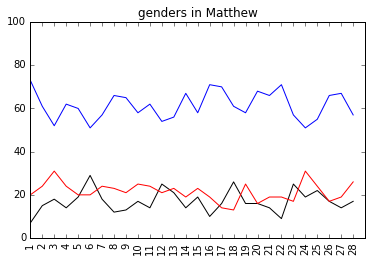

In [74]:
show_chapters('Matthew')

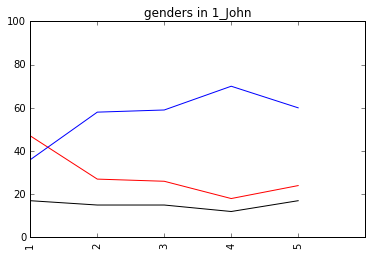

In [76]:
show_chapters('1_John')

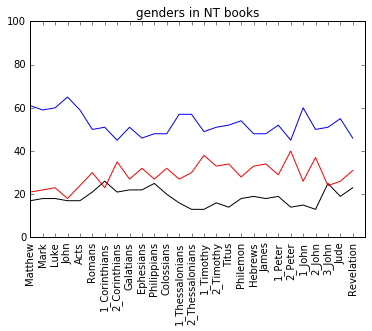

In [75]:
show_books()